In [1]:
import numpy as np 
import pandas as pd 
pd.set_option('display.max_colwidth', -1)
from time import time
import re
import string
import os
import emoji
from pprint import pprint
import collections

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
sns.set(font_scale=1.3)

import gensim
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from spellchecker import SpellChecker

import warnings
warnings.filterwarnings('ignore')

np.random.seed(37)

In [2]:
df_tweet_en = pd.read_pickle('../data/final/NotIot_EN_tweets.p')
df_tweet_en

,Tweet,anger,anticipation,disgust,fear,joy,love,optimism,pessimism,sadness,surprise,trust
ID,,,,,,,,,,,,
2018-En-02878,Happy to share my new video preview with some of my local fav's!\n#compose #excitement @CBCMusic @Musicyyc @CJSW @BreakOutWest @HifiClub,0,0,0,0,1,0,1,0,0,0,0
2017-En-31339,@FieldYates @MatthewBerryTMR @Stephania_ESPN @MikeClayNFL @FrankCaliendo goddamn...the 'celebrity' draft at the end was classic.,0,1,0,0,1,0,1,0,0,0,0
2017-En-41241,Dreams dashed and divided like million stars in the night sky.,0,0,0,0,0,0,0,1,1,0,0
2017-En-31436,Accept the challenges so that you can literally even feel the exhilaration of victory.' -- George S. Patton 🐶,0,0,0,0,1,0,1,0,0,0,0
2018-En-03459,Happy birthday to ma brother from another mother @Official1Cedi dis year More blessing #Break itz,0,0,0,0,1,0,1,0,0,0,0
2017-En-30393,Just now we were rejoicing that we finally won a match the draw just revealed that we are facing city next. This life sef,0,0,0,0,1,0,1,0,0,0,0
2017-En-22075,The cure for anxiety is an intimate relationship with Christ. - 1 John 4:18 #anxiety,0,0,0,1,0,0,1,0,0,0,0
2017-En-40506,I have serious problems with the expectation that private philanthropy should replace functional government services...this is dangerous,1,0,1,1,0,0,0,0,0,0,0
2017-En-20137,#India right of reply at #UNGA - #Pakistan preaching of human rights is by a country which is itself the global epicentre of #terrorism,1,0,1,1,0,0,0,0,1,0,0


In [3]:
new_df_tweet_en = pd.DataFrame(columns=['text', 'emotion'])
for row in df_tweet_en.itertuples(index=False):
    column_name  = ['anger','anticipation','disgust','fear','joy','love','optimism','pessimism','sadness','surprise','trust']
    for i in range (1,len(row)-1): 
        if row[i] == 1:
            emotion = column_name[i-1]
            text = row.Tweet
            new_df_tweet_en = new_df_tweet_en.append({'text' : text , 'emotion' : emotion} , ignore_index=True)
            break
new_df_tweet_en

,text,emotion
0,Happy to share my new video preview with some of my local fav's!\n#compose #excitement @CBCMusic @Musicyyc @CJSW @BreakOutWest @HifiClub,joy
1,@FieldYates @MatthewBerryTMR @Stephania_ESPN @MikeClayNFL @FrankCaliendo goddamn...the 'celebrity' draft at the end was classic.,anticipation
2,Dreams dashed and divided like million stars in the night sky.,pessimism
3,Accept the challenges so that you can literally even feel the exhilaration of victory.' -- George S. Patton 🐶,joy
4,Happy birthday to ma brother from another mother @Official1Cedi dis year More blessing #Break itz,joy
5,Just now we were rejoicing that we finally won a match the draw just revealed that we are facing city next. This life sef,joy
6,The cure for anxiety is an intimate relationship with Christ. - 1 John 4:18 #anxiety,fear
7,I have serious problems with the expectation that private philanthropy should replace functional government services...this is dangerous,anger
8,#India right of reply at #UNGA - #Pakistan preaching of human rights is by a country which is itself the global epicentre of #terrorism,anger
9,@faithstrust @TheeCurrentYear imagine being this stupid for trying to chirp because of some racist prick.,anger


In [37]:
class TextCounts(BaseEstimator, TransformerMixin):
    
    def count_regex(self, pattern, tweet):
        return len(re.findall(pattern, tweet))
    
    def fit(self, X, y=None, **fit_params):
        # fit method is used when specific operations need to be done on the train data, but not on the test data
        return self
    def space_uderscore(self, input_text):
        # By compressing the underscore, the emoji is kept as one word
        #return re.sub(r':([a-z&]+)_([a-z&]+):', r'\1\2', input_text)
        return input_text.replace('_',' ')
    
    def emoji_demojize(self, input_text):
        text = emoji.demojize(input_text)
        return text

    def transform(self, X, **transform_params):
        count_words = X.apply(lambda x: self.count_regex(r'\w+', x)) 
        count_mentions = X.apply(lambda x: self.count_regex(r'@\w+', x))
        count_hashtags = X.apply(lambda x: self.count_regex(r'#\w+', x))
        count_capital_words = X.apply(lambda x: self.count_regex(r'\b[A-Z]{2,}\b', x))
        count_excl_quest_marks = X.apply(lambda x: self.count_regex(r'!|\?', x))
        count_urls = X.apply(lambda x: self.count_regex(r'http.?://[^\s]+[\s]?', x))
        # We will replace the emoji symbols with a description, which makes using a regex for counting easier
        # Moreover, it will result in having more words in the tweet
        count_emojis = X.apply(self.space_uderscore).apply(self.emoji_demojize).apply(lambda x: self.count_regex(r':[a-z_&]+:', x))
        
        df = pd.DataFrame({'count_words': count_words
                           , 'count_mentions': count_mentions
                           , 'count_hashtags': count_hashtags
                           , 'count_capital_words': count_capital_words
                           , 'count_excl_quest_marks': count_excl_quest_marks
                           , 'count_urls': count_urls
                           , 'count_emojis': count_emojis
                          })
        
        return df

In [38]:
textcount = TextCounts()
df_eda = textcount.fit_transform(new_df_tweet_en.text)
# Add airline_sentiment to df_eda
df_eda['sentiment'] = new_df_tweet_en.emotion
df_eda['origin_text'] = new_df_tweet_en.text


In [39]:
def show_dist(df, col):
    print('Descriptive stats for {}'.format(col))
    print('-'*(len(col)+22))
    print(df.groupby('sentiment')[col].describe())
    bins = np.arange(df[col].min(), df[col].max() + 1)
    g = sns.FacetGrid(df, col='sentiment', size=5, hue='sentiment', palette="PuBuGn_d")
    g = g.map(sns.distplot, col, kde=False, norm_hist=True, bins=bins)
    plt.show()

Descriptive stats for count_words
---------------------------------
               count       mean       std  min    25%   50%    75%   max
sentiment                                                               
anger         2859.0  17.195873  6.794708  1.0  12.00  18.0  23.00  35.0
anticipation  913.0   16.639650  6.598149  3.0  11.00  17.0  22.00  32.0
disgust       507.0   16.364892  6.977872  2.0  11.00  16.0  22.00  33.0
fear          629.0   16.166932  7.133784  2.0  10.00  17.0  22.00  33.0
joy           1938.0  15.963880  6.844594  2.0  10.00  16.0  21.75  36.0
love          34.0    19.735294  7.059525  5.0  14.75  22.0  25.00  28.0
optimism      193.0   18.523316  6.271689  4.0  14.00  19.0  24.00  32.0
pessimism     213.0   15.591549  7.286413  1.0  9.00   16.0  22.00  30.0
sadness       203.0   15.295567  7.576104  1.0  9.00   15.0  22.00  33.0
surprise      17.0    14.000000  4.795832  7.0  10.00  14.0  17.00  22.0


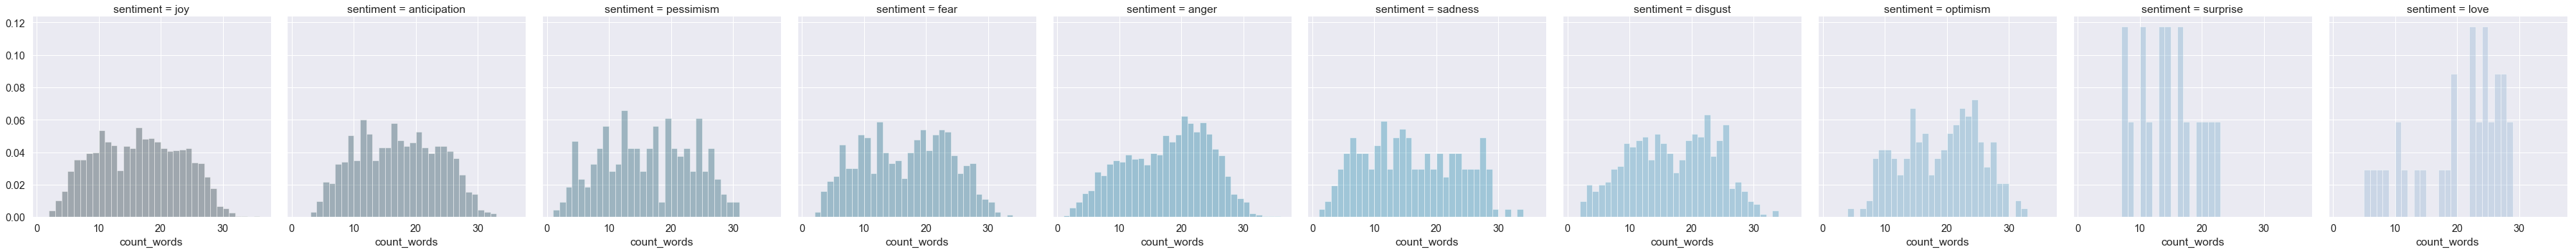

In [40]:
show_dist(df_eda, 'count_words')

Descriptive stats for count_mentions
------------------------------------
               count      mean       std  min  25%  50%  75%  max
sentiment                                                        
anger         2859.0  0.704092  0.922782  0.0  0.0  0.0  1.0  9.0
anticipation  913.0   0.595838  0.867205  0.0  0.0  0.0  1.0  6.0
disgust       507.0   0.656805  0.898268  0.0  0.0  0.0  1.0  6.0
fear          629.0   0.445151  0.828779  0.0  0.0  0.0  1.0  6.0
joy           1938.0  0.608875  0.864467  0.0  0.0  0.0  1.0  8.0
love          34.0    0.470588  0.748141  0.0  0.0  0.0  1.0  3.0
optimism      193.0   0.383420  0.659967  0.0  0.0  0.0  1.0  4.0
pessimism     213.0   0.403756  0.711353  0.0  0.0  0.0  1.0  4.0
sadness       203.0   0.507389  0.726918  0.0  0.0  0.0  1.0  5.0
surprise      17.0    0.529412  0.717430  0.0  0.0  0.0  1.0  2.0


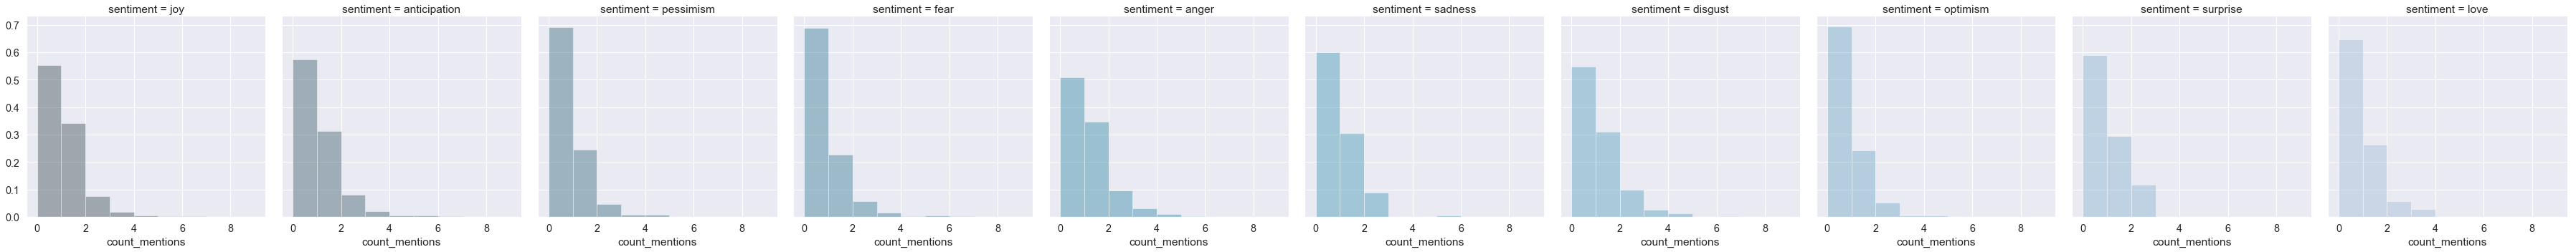

In [41]:
show_dist(df_eda, 'count_mentions')

Descriptive stats for count_hashtags
------------------------------------
               count      mean       std  min  25%  50%  75%   max
sentiment                                                         
anger         2859.0  0.981462  1.650330  0.0  0.0  0.0  1.0  14.0
anticipation  913.0   1.190581  2.035011  0.0  0.0  0.0  2.0  15.0
disgust       507.0   0.968442  1.570161  0.0  0.0  0.0  1.0  12.0
fear          629.0   1.421304  2.005309  0.0  0.0  1.0  2.0  13.0
joy           1938.0  1.227554  1.994138  0.0  0.0  0.0  2.0  16.0
love          34.0    0.882353  1.950364  0.0  0.0  0.0  1.0  9.0 
optimism      193.0   1.160622  1.947248  0.0  0.0  0.0  2.0  9.0 
pessimism     213.0   0.934272  1.615199  0.0  0.0  0.0  1.0  11.0
sadness       203.0   0.793103  1.423478  0.0  0.0  0.0  1.0  11.0
surprise      17.0    0.764706  1.480262  0.0  0.0  0.0  1.0  6.0 


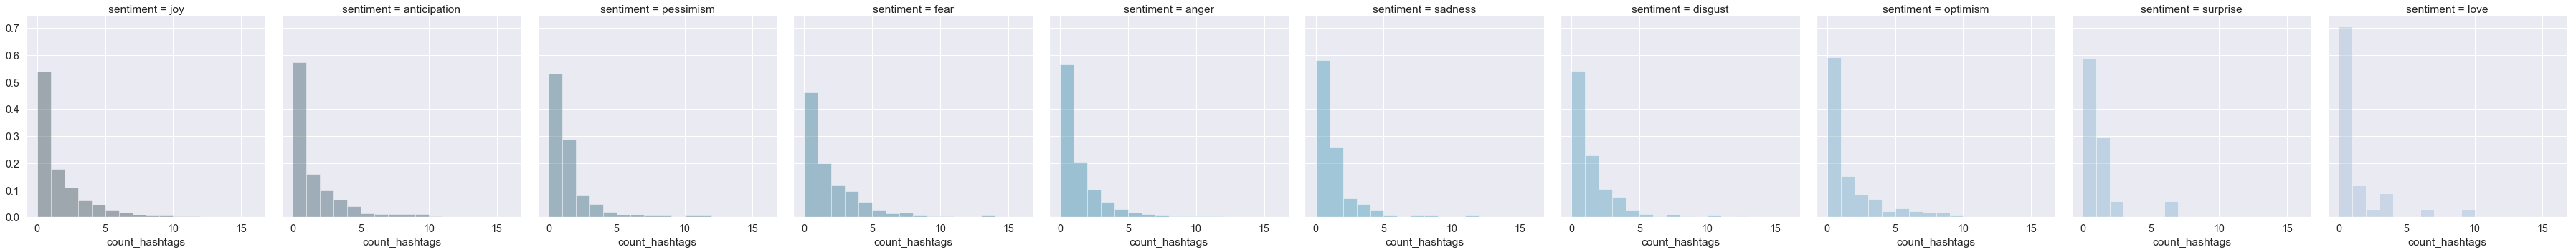

In [42]:
show_dist(df_eda, 'count_hashtags')

Descriptive stats for count_capital_words
-----------------------------------------
               count      mean       std  min  25%  50%  75%   max
sentiment                                                         
anger         2859.0  0.287163  1.038995  0.0  0.0  0.0  0.0  21.0
anticipation  913.0   0.243154  0.765211  0.0  0.0  0.0  0.0  11.0
disgust       507.0   0.163708  0.532375  0.0  0.0  0.0  0.0  6.0 
fear          629.0   0.166932  0.557908  0.0  0.0  0.0  0.0  6.0 
joy           1938.0  0.191434  0.709831  0.0  0.0  0.0  0.0  11.0
love          34.0    0.117647  0.409338  0.0  0.0  0.0  0.0  2.0 
optimism      193.0   0.160622  0.530432  0.0  0.0  0.0  0.0  3.0 
pessimism     213.0   0.103286  0.556809  0.0  0.0  0.0  0.0  7.0 
sadness       203.0   0.113300  0.400458  0.0  0.0  0.0  0.0  3.0 
surprise      17.0    0.176471  0.528594  0.0  0.0  0.0  0.0  2.0 


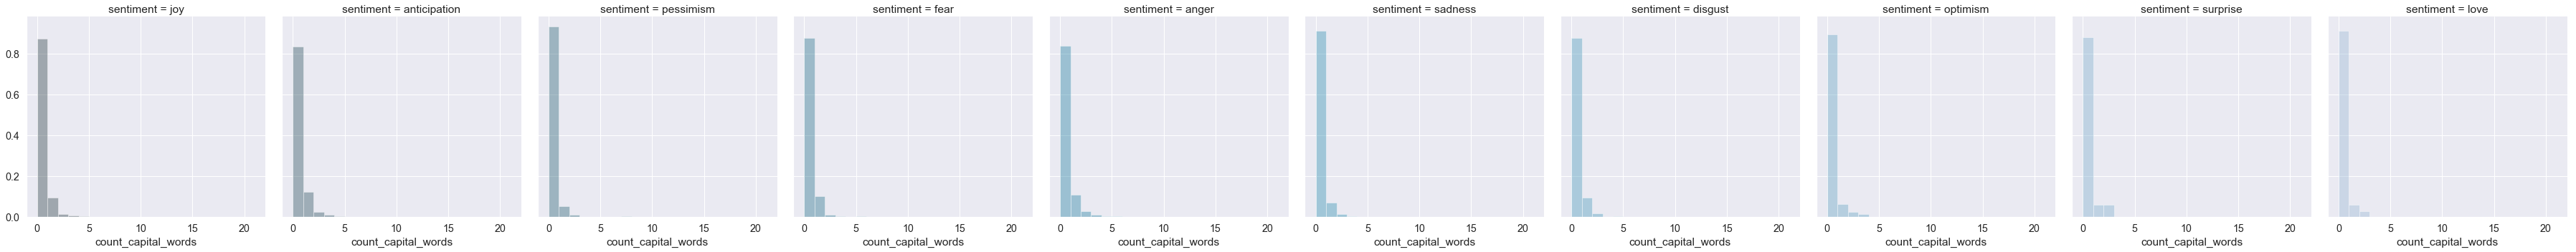

In [43]:
show_dist(df_eda, 'count_capital_words')

Descriptive stats for count_excl_quest_marks
--------------------------------------------
               count      mean       std  min  25%  50%  75%   max
sentiment                                                         
anger         2859.0  0.427422  1.001694  0.0  0.0  0.0  0.0  12.0
anticipation  913.0   0.470975  0.978654  0.0  0.0  0.0  1.0  9.0 
disgust       507.0   0.289941  0.752307  0.0  0.0  0.0  0.0  7.0 
fear          629.0   0.375199  0.940468  0.0  0.0  0.0  0.0  7.0 
joy           1938.0  0.418989  0.944451  0.0  0.0  0.0  0.0  10.0
love          34.0    0.411765  0.891633  0.0  0.0  0.0  0.0  4.0 
optimism      193.0   0.202073  0.554899  0.0  0.0  0.0  0.0  4.0 
pessimism     213.0   0.295775  0.927479  0.0  0.0  0.0  0.0  7.0 
sadness       203.0   0.192118  0.586597  0.0  0.0  0.0  0.0  5.0 
surprise      17.0    0.294118  0.587868  0.0  0.0  0.0  0.0  2.0 


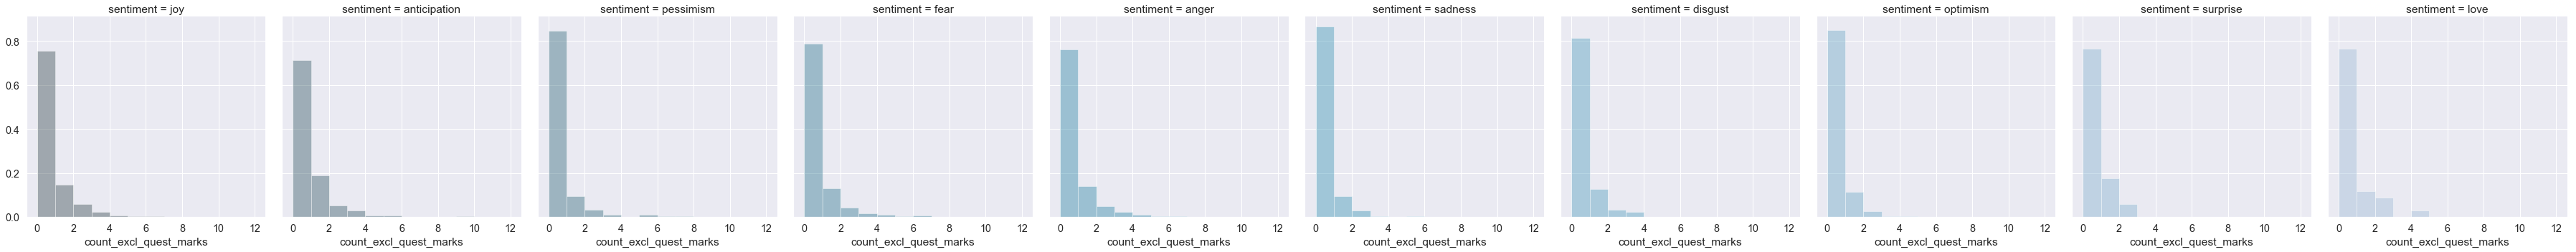

In [44]:
show_dist(df_eda, 'count_excl_quest_marks')

Descriptive stats for count_urls
--------------------------------
               count  mean  std  min  25%  50%  75%  max
sentiment                                               
anger         2859.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0
anticipation  913.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0
disgust       507.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0
fear          629.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0
joy           1938.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0
love          34.0    0.0   0.0  0.0  0.0  0.0  0.0  0.0
optimism      193.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0
pessimism     213.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0
sadness       203.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0
surprise      17.0    0.0   0.0  0.0  0.0  0.0  0.0  0.0


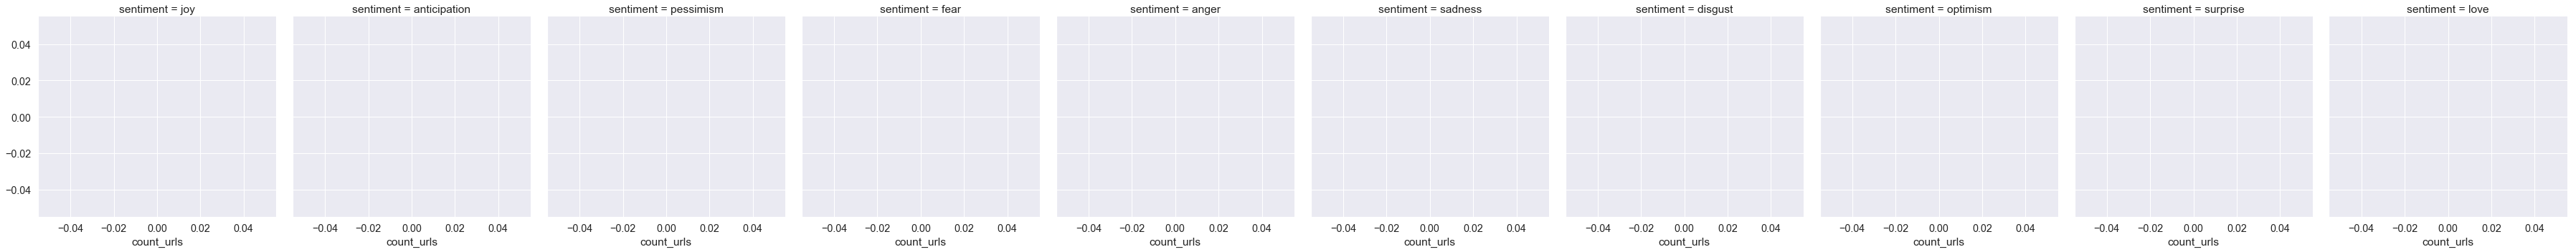

In [45]:
show_dist(df_eda, 'count_urls')

Descriptive stats for count_emojis
----------------------------------
               count      mean       std  min  25%  50%  75%   max
sentiment                                                         
anger         2859.0  0.199720  0.720819  0.0  0.0  0.0  0.0  10.0
anticipation  913.0   0.246440  2.480527  0.0  0.0  0.0  0.0  73.0
disgust       507.0   0.209073  0.932333  0.0  0.0  0.0  0.0  14.0
fear          629.0   0.193959  0.633885  0.0  0.0  0.0  0.0  5.0 
joy           1938.0  0.340041  1.008204  0.0  0.0  0.0  0.0  15.0
love          34.0    0.235294  0.889631  0.0  0.0  0.0  0.0  5.0 
optimism      193.0   0.082902  0.437045  0.0  0.0  0.0  0.0  4.0 
pessimism     213.0   0.248826  0.782510  0.0  0.0  0.0  0.0  6.0 
sadness       203.0   0.206897  0.728862  0.0  0.0  0.0  0.0  7.0 
surprise      17.0    0.411765  1.003670  0.0  0.0  0.0  0.0  3.0 


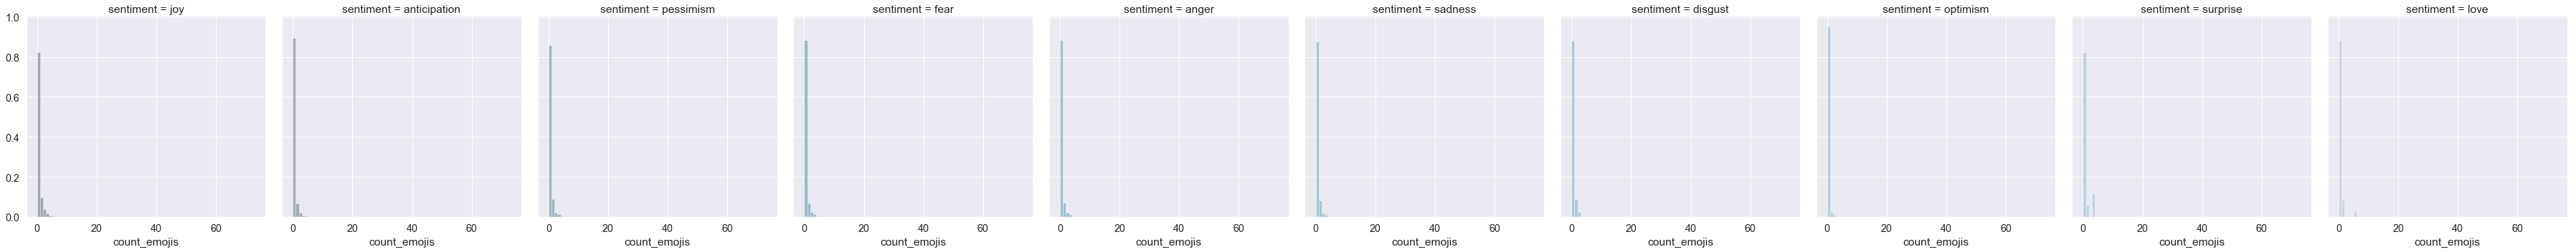

In [46]:
show_dist(df_eda, 'count_emojis')

In [68]:
class CleanText(BaseEstimator, TransformerMixin):
    
    def remove_mentions(self, input_text):
        return re.sub(r'@\w+', '', input_text)
    
    #def remove_hashtags(self, input_text):
        #return re.sub(r'#\w+', '', input_text)    
    
    def remove_urls(self, input_text):
        return re.sub(r'http.?://[^\s]+[\s]?', '', input_text)
    
    def emoji_demojize(self, input_text):
        #demojize all emojis 
        return emoji.demojize(input_text)
    
    def emoji_oneword(self, input_text):
        # By compressing the underscore, the emoji is kept as one word
        #return re.sub(r':([a-z&]+)_([a-z&]+):', r'\1\2', input_text)
        return input_text.replace('_','')
    
    def remove_punctuation(self, input_text):
        # Make translation table
        punct = string.punctuation
        trantab = str.maketrans(punct, len(punct)*' ')  # Every punctuation symbol will be replaced by a space
        return input_text.translate(trantab)

    def remove_digits(self, input_text):
        return re.sub('\d+', '', input_text)
    
    def to_lower(self, input_text):
        return input_text.lower()
    
    def replace_acronyms(self, input_text):
        acronyms_dic = {"B4" : "before","BFN":"bye for now","BGD" : "background","BH":"blockhead","BR":"best regards",
                        "BTW" : "by the way","OMG":"oh my god"}
        acronyms_pattern = re.compile(r'\b(' + '|'.join(acronyms_dic.keys()) + r')\b')
        return acronyms_pattern.sub(lambda x: acronyms_dic[x.group()], input_text)
        
    def stopwords_spell(self, input_text):
        stopwords_list = stopwords.words('english')
        # Some words which might indicate a certain sentiment are kept via a whitelist
        whitelist = ["n't", "not", "no"]
        blacklist = ["via","rt"]
        words = input_text.split() 
        clean_words = [word for word in words if (word not in stopwords_list or word in whitelist) and (word not in blacklist) and len(word) > 1] 
        #correct words
        #spell = SpellChecker()
        correct_words = [word for word in clean_words]
        return " ".join(correct_words) 
    
    def stemming(self, input_text):
        porter = PorterStemmer()
        words = input_text.split() 
        stemmed_words = [porter.stem(word) for word in words]
        return " ".join(stemmed_words)
    
    def fit(self, X, y=None, **fit_params):
        return self
    
    def transform(self, X, **transform_params):
        clean_X = X.apply(self.remove_mentions).apply(self.remove_urls).apply(self.emoji_demojize).apply(self.emoji_oneword).apply(self.replace_acronyms).apply(self.remove_punctuation).apply(self.remove_digits).apply(self.to_lower).apply(self.stopwords_spell)
        return clean_X

In [69]:
cleantext = CleanText()
sr_clean = cleantext.fit_transform(new_df_tweet_en.text)
sr_clean.sample(5)

3682    joke bully                                                                             
906     ps still think broken leg scott steiner one horrific injuries ever seen ring ccot      
5061    well cucks among ranks agree equally outrage black youths shot harambe                 
4523    terrible thing see no vision nhelen keller begin end mind nstephen covey whereareugoing
6749    love insta                                                                             
Name: text, dtype: object

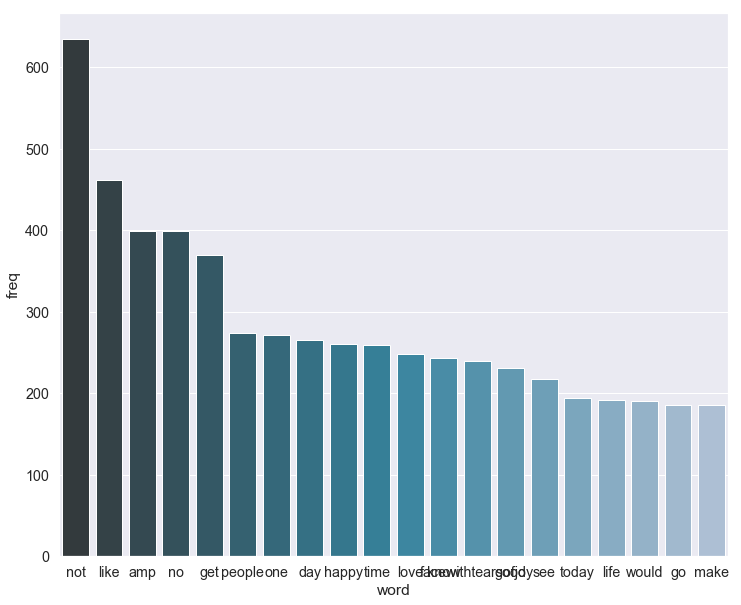

In [70]:
cv = CountVectorizer()
bow = cv.fit_transform(sr_clean)
word_freq = dict(zip(cv.get_feature_names(), np.asarray(bow.sum(axis=0)).ravel()))
word_counter = collections.Counter(word_freq)
word_counter_df = pd.DataFrame(word_counter.most_common(20), columns = ['word', 'freq'])

fig, ax = plt.subplots(figsize=(12, 10))
bar_freq_word = sns.barplot(x="word", y="freq", data=word_counter_df, palette="PuBuGn_d", ax=ax)
plt.show();

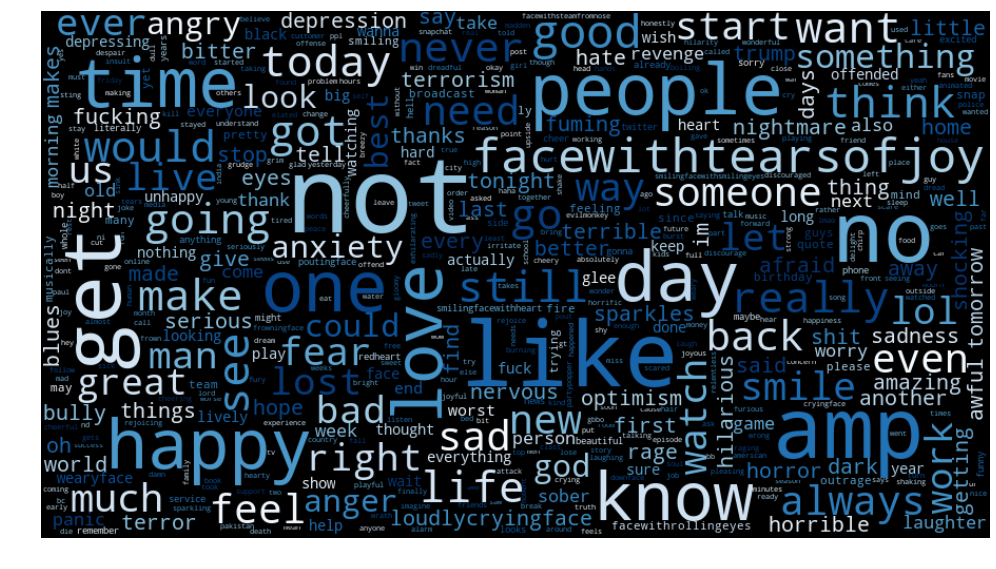

In [71]:
# draw a Word Cloud with word frequencies
wordcloud = WordCloud(width=900,
                      height=500,
                      max_words=500,
                      max_font_size=100,
                      relative_scaling=0.5,
                      colormap='Blues',
                      normalize_plurals=True).generate_from_frequencies(word_counter)

plt.figure(figsize=(17,14))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [72]:
df_model = df_eda
df_model['clean_text'] = sr_clean
df_model = df_model.drop_duplicates('clean_text')

In [73]:
df_model.shape

(7438, 10)

In [74]:
df_model.info

<bound method DataFrame.info of       count_words  count_mentions  count_hashtags  count_capital_words  \
0     22           5               2               1                     
1     14           5               0               0                     
2     11           0               0               0                     
3     17           0               0               0                     
4     15           1               1               0                     
5     24           0               0               0                     
6     15           0               1               0                     
7     18           0               0               0                     
8     23           0               4               1                     
9     15           2               0               0                     
10    19           1               0               0                     
11    24           0               2               0                     
12    

In [75]:
df_model['clean_text'].replace('', np.nan, inplace=True)

In [76]:
df_model = df_model.dropna(axis=0, subset=['clean_text'])
df_model

,count_words,count_mentions,count_hashtags,count_capital_words,count_excl_quest_marks,count_urls,count_emojis,sentiment,origin_text,clean_text
0,22,5,2,1,1,0,0,joy,Happy to share my new video preview with some of my local fav's!\n#compose #excitement @CBCMusic @Musicyyc @CJSW @BreakOutWest @HifiClub,happy share new video preview local fav compose excitement
1,14,5,0,0,0,0,0,anticipation,@FieldYates @MatthewBerryTMR @Stephania_ESPN @MikeClayNFL @FrankCaliendo goddamn...the 'celebrity' draft at the end was classic.,goddamn celebrity draft end classic
2,11,0,0,0,0,0,0,pessimism,Dreams dashed and divided like million stars in the night sky.,dreams dashed divided like million stars night sky
3,17,0,0,0,0,0,1,joy,Accept the challenges so that you can literally even feel the exhilaration of victory.' -- George S. Patton 🐶,accept challenges literally even feel exhilaration victory george patton dogface
4,15,1,1,0,0,0,0,joy,Happy birthday to ma brother from another mother @Official1Cedi dis year More blessing #Break itz,happy birthday brother another mother dis year blessing break itz
5,24,0,0,0,0,0,0,joy,Just now we were rejoicing that we finally won a match the draw just revealed that we are facing city next. This life sef,rejoicing finally match draw revealed facing city next life sef
6,15,0,1,0,0,0,0,fear,The cure for anxiety is an intimate relationship with Christ. - 1 John 4:18 #anxiety,cure anxiety intimate relationship christ john anxiety
7,18,0,0,0,0,0,0,anger,I have serious problems with the expectation that private philanthropy should replace functional government services...this is dangerous,serious problems expectation private philanthropy replace functional government services dangerous
8,23,0,4,1,0,0,0,anger,#India right of reply at #UNGA - #Pakistan preaching of human rights is by a country which is itself the global epicentre of #terrorism,india right reply unga pakistan preaching human rights country global epicentre terrorism
9,15,2,0,0,0,0,0,anger,@faithstrust @TheeCurrentYear imagine being this stupid for trying to chirp because of some racist prick.,imagine stupid trying chirp racist prick


In [77]:
df_model.to_pickle('../data/pickle_emotion/df_model_en_.p') # save dframe to pickle

In [78]:
joy_tweets = pd.Series(["My room is almost 100% fully automated. Almost every device can communicate with one another. I'm so in love. I love technology. #IoT"
                      ,"I love technology! The possibilities are endless. I can’t wait to publish my first paper! 👩🏽‍💻 #Software #computerscience #computationalthinking  #iot"
                      ,"Great question! I love the #aiot example from @VolvoTrucks - predicting maintenance issues using #IoT and #AI. (link: https://www.sas.com/en_us/customers/volvo-trucks-mack-trucks.html) sas.com/en_us/customer… "])

df_counts_joy = textcount.transform(joy_tweets)
df_clean_joy = cleantext.transform(joy_tweets)
df_model_joy = df_counts_joy
df_model_joy['clean_text'] = df_clean_joy
df_model_joy.to_pickle('../data/df_model_joy.p')

In [79]:
anger_tweets = pd.Series(["I really hate what people are trying to do with #IoT. It's not even practical."
                      ,"I do not like #Iot because i hate"
                      ,"I hate the invasiveness of #IoT and I'm worried about @google's continued overt AND covert attempts to shut down speech with which their Far Left San Francisco values disagrees. But man do I love that #HomeAlone commercial. #UTvsUGA #GoDawgs"])

df_counts_anger = textcount.transform(anger_tweets)
df_clean_anger = cleantext.transform(anger_tweets)
df_model_anger = df_counts_anger
df_model_anger['clean_text'] = df_clean_anger
df_model_anger.to_pickle('../data/df_model_anger.p')

In [80]:
fear_tweets = pd.Series(["i'm afraid to use iot"])

df_counts_fear = textcount.transform(fear_tweets)
df_clean_fear = cleantext.transform(fear_tweets)
df_model_fear = df_counts_fear
df_model_fear['clean_text'] = df_clean_fear
df_model_fear.to_pickle('../data/df_model_fear.p')

In [81]:
love_tweets = pd.Series(["i love iot"])

df_counts_love = textcount.transform(love_tweets)
df_clean_love = cleantext.transform(love_tweets)
df_model_love = df_counts_love
df_model_love['clean_text'] = df_clean_love
df_model_love.to_pickle('../data/df_model_love.p')